data/pills-blue.npy: (67111, 13) -> (9588, 13)
compute time: 3.4030697345733643
Z (9587, 4) [[1.61300000e+03 1.64500000e+03 4.90042473e+00 2.00000000e+00]
 [3.51000000e+03 4.03300000e+03 6.22146398e+00 2.00000000e+00]
 [1.41000000e+03 1.77600000e+03 6.25871255e+00 2.00000000e+00]
 [2.84000000e+02 2.95000000e+02 6.63843025e+00 2.00000000e+00]
 [6.57500000e+03 6.82000000e+03 6.90144236e+00 2.00000000e+00]
 [4.34800000e+03 4.45700000e+03 7.21574071e+00 2.00000000e+00]
 [4.35300000e+03 4.39100000e+03 7.35812179e+00 2.00000000e+00]
 [4.34000000e+03 4.75500000e+03 7.39474359e+00 2.00000000e+00]
 [5.47200000e+03 6.34100000e+03 7.49374208e+00 2.00000000e+00]
 [5.02300000e+03 5.14600000e+03 8.01658693e+00 2.00000000e+00]]


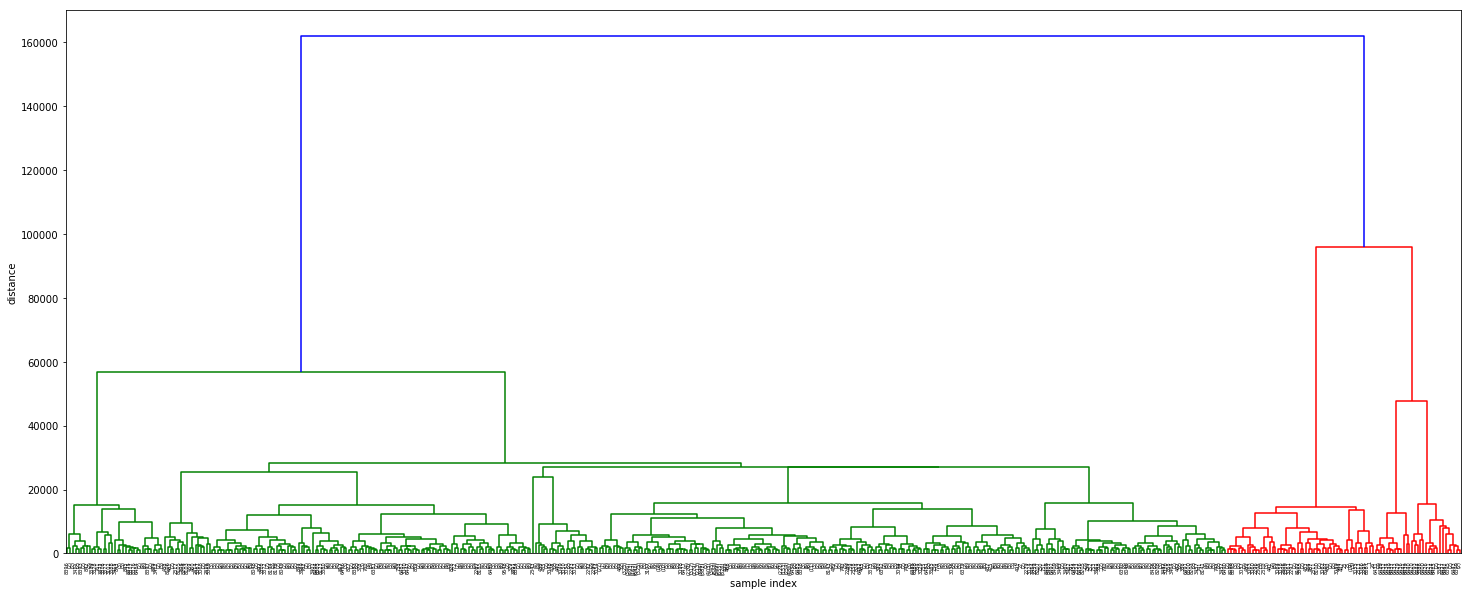

In [9]:
# -------------------------------------------------------------
#
# scipy's "linkage()" function can't handle our data sizes
#
# ------------------------------------------------------------
%matplotlib inline


import time
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist

def subsample(data, max_size=10000):
    orig_size = data.shape
    if len(data) > max_size:
        sub_sample = round(len(data) / max_size)
        data = data[::sub_sample]
    return data, orig_size

link_type = 'ward'
FILE = 'data/pills-blue.npy'
X = np.load(FILE)
X, orig_shape = subsample(X)
print('{}: {} -> {}'.format(FILE, orig_shape, X.shape))

t0 = time.time()
Z = linkage(X, link_type)
t1 = time.time()

print('compute time:', t1-t0)
print('Z', Z.shape, Z[:10])

plt.figure(figsize=(25, 10))
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z, p=500, truncate_mode='lastp')
plt.show()